# Exercícios: Teste de Normalidade e Teste de Hipótese

Aplique os conhecimentos do notebook resolvendo os problemas abaixo.



In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Exercício 1: Teste de Normalidade

1. Aplique o teste de Shapiro-Wilk e interprete o resultado (α = 0.05)
2. A média de valores nas duas distribuições se difere da média histórica (20)

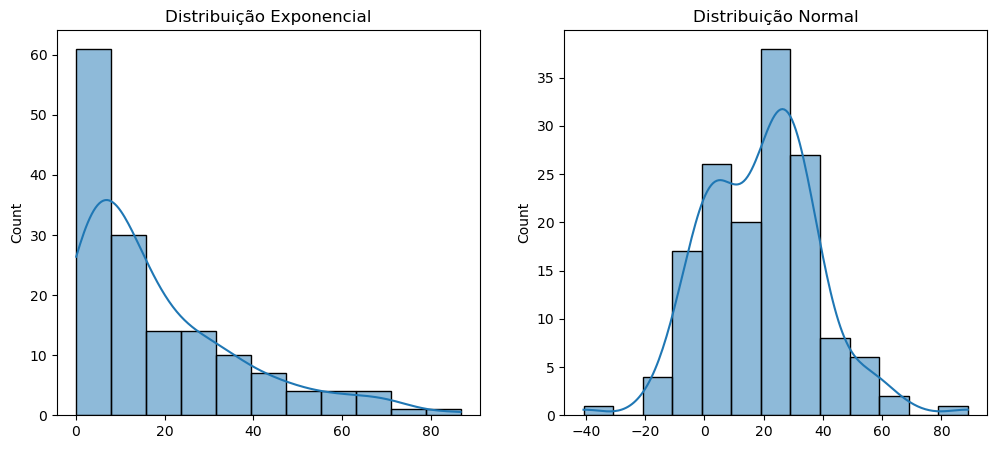

In [ ]:
np.random.seed(42)
exponencial = np.random.exponential(scale=20, size=150)
normal = np.random.normal(loc=exponencial.mean(), scale=exponencial.std(), size=150)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(exponencial, kde=True)
plt.title('Distribuição Exponencial')

plt.subplot(1, 2, 2)
sns.histplot(normal, kde=True)
plt.title('Distribuição Normal')
plt.show()

In [7]:
# Espaço para sua solução
stat_exp, p_exp = stats.shapiro(exponencial)
stat_norm, p_norm = stats.shapiro(normal)

print(f"Exponencial: Estatística={stat_exp:.4f}, p-value={p_exp:.4f}")
print("Conclusão: NÃO segue distribuição normal" if p_exp < 0.05 else "Conclusão: Segue distribuição normal")

print(f"\nNormal: Estatística={stat_norm:.4f}, p-value={p_norm:.4f}")
print("Conclusão: NÃO segue distribuição normal" if p_norm < 0.05 else "Conclusão: Segue distribuição normal")

#Como as duas distribuições não possui distribuição normal, será utilizado o teste de Wilcoxon afim de comparar a mediana com a média histórica
media_historica = 20

def wilcoxon(data, mean):
    w_stat, w_p_val = stats.wilcoxon(data - mean)

    print(f'Estatisca do teste: {w_stat:.4f}, p_val: {w_p_val:.4f}')

    if w_p_val > 0.05:
        print(f"A média da amostra é igual a média histórica {mean:.2f} (falha em rejeitar h0)")
    else:
        print("A média da amostra é diferente da média histórica (rejeita-se h0)")

print('\nTestando a primeira distribuição:')
wilcoxon(exponencial,media_historica)

print('\nTestando a segunda distribuição:')
wilcoxon(normal,media_historica)

Exponencial: Estatística=0.8407, p-value=0.0000
Conclusão: NÃO segue distribuição normal

Normal: Estatística=0.9821, p-value=0.0478
Conclusão: NÃO segue distribuição normal

Testando a primeira distribuição:
Estatisca do teste: 4276.0000, p_val: 0.0093
A média da amostra é diferente da média histórica (rejeita-se h0)

Testando a segunda distribuição:
Estatisca do teste: 5273.0000, p_val: 0.4649
A média da amostra é igual a média histórica 20.00 (falha em rejeitar h0)


## Exercício 2: Teste t para uma Amostra

Um fabricante afirma que suas lâmpadas têm vida média de 1200 horas. Uma amostra de 30 lâmpadas apresentou:

1. Verifique a normalidade dos dados
2. Teste a hipótese do fabricante (H0: μ = 1200)
3. Interprete o resultado com α = 0.05

In [16]:
amostra = np.array([1150, 1250, 1100, 1180, 1210, 1300, 1220, 1170, 1190, 1240,
                   1160, 1230, 1200, 1190, 1210, 1180, 1220, 1170, 1200, 1250,
                   1100, 1180, 1230, 1190, 1210, 1170, 1220, 1180, 1200, 1240])

In [17]:
# Espaço para sua solução
# 1. Teste de normalidade
def shapiro(amostra):
    stat, p = stats.shapiro(amostra)
    print(f"Shapiro-Wilk: Estatística={stat:.4f}, p-value={p:.4f}")
    print("Os dados são normais?", "Sim" if p > 0.05 else "Não")

shapiro(amostra= amostra)
    
# 2. Teste t
t_stat, p_val = stats.ttest_1samp(amostra, 1200)
print(f"\nTeste t: Estatística={t_stat:.4f}, p-value={p_val:.4f}")

# 3. Interpretação
alpha = 0.05
if p_val < alpha:
    print(f"Conclusão: Rejeitamos H0 (p < {alpha}). A vida média DIFERE de 1200 horas.")
else:
    print(f"Conclusão: Não rejeitamos H0 (p > {alpha}). Não há evidências contra a afirmação do fabricante.")

Shapiro-Wilk: Estatística=0.9591, p-value=0.2937
Os dados são normais? Sim

Teste t: Estatística=-0.2636, p-value=0.7939
Conclusão: Não rejeitamos H0 (p > 0.05). Não há evidências contra a afirmação do fabricante.


## Exercício 3: ANOVA

# Análise Estatística de Eficácia de Tratamentos Médicos

## Contexto
Um laboratório farmacêutico desenvolveu dois novos medicamentos (Droga X e Droga Y) para redução de pressão arterial e deseja comparar sua eficácia com um placebo em um ensaio clínico randomizado.

## Dados
Foram coletados dados de 90 pacientes (30 em cada grupo) após 4 semanas de tratamento:
- **Grupo A (Placebo)**: Tratamento com comprimido inertes
- **Grupo B (Droga X)**: Medicação padrão do mercado
- **Grupo C (Droga Y)**: Nova medicação experimental

A variável resposta é a **redução da pressão arterial sistólica (mmHg)**.

## Objetivo
Determinar se existe diferença estatisticamente significativa na eficácia entre os três tratamentos.

## Tarefas
1. **Análise Exploratória**:
   - Visualizar a distribuição dos dados por grupo (boxplot)
   - Calcular estatísticas descritivas (média, desvio padrão)

2. **Verificação de Pressupostos**:
   - Testar normalidade dos dados (Shapiro-Wilk)
   - Verificar homogeneidade de variâncias (Levene)

3. **ANOVA Unidirecional**:
   - Executar o teste para mais de uma amostra
   - Interpretar o resultado (α = 0.05)

5. **Conclusão**:
   - Recomendar o tratamento mais eficaz

## Requisitos Técnicos
- Nível de significância: 5%
- Testes utilizados:
  - Shapiro-Wilk (normalidade)
  - Levene (homocedasticidade)
  - ANOVA paramétrica



In [13]:
# Dados simulados: redução da pressão arterial (mmHg) após 4 semanas de tratamento
np.random.seed(42)
tratamento_A = np.random.normal(loc=12, scale=2.5, size=30)  # Placebo
tratamento_B = np.random.normal(loc=15, scale=2.5, size=30)  # Droga X
tratamento_C = np.random.normal(loc=20, scale=2.5, size=30)  # Droga Y

#Ops, aqui é um dataframe com redução (Ainda não expliquei :(  ) 
df = pd.DataFrame({
    'Reducao': np.concatenate([tratamento_A, tratamento_B, tratamento_C]),
    'Tratamento': ['A']*30 + ['B']*30 + ['C']*30
})

df_tratamentos = pd.DataFrame({'A': tratamento_A, 'B':tratamento_B, 'C':tratamento_C})

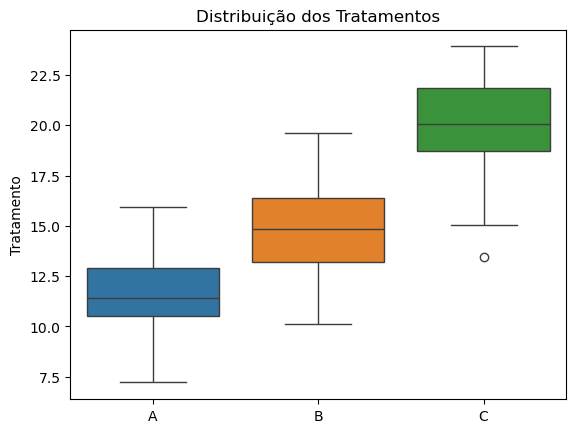


Estatísca de Levene: 0.14798127787925683 P valor: 0.8626638812717601
Os tratamentos tem variância semelhante (falha em rejeitar h0)


Tratamento A:
Shapiro-Wilk: Estatística=0.9751, p-value=0.6868
Os dados são normais? Sim
Tratamento B:
Shapiro-Wilk: Estatística=0.9837, p-value=0.9130
Os dados são normais? Sim
Tratamento C:
Shapiro-Wilk: Estatística=0.9628, p-value=0.3654
Os dados são normais? Sim


Estatísca da ANOVA: 99.92372436509423 P valor: 2.8924732859158176e-23


Os tratamentos não apresentam diferenças significativas (falha em rejeitar h0)


In [ ]:
# Espaço para sua solução

#Ex 01 -  Boxplot para visualizar a distribuição e Estatísticas
sns.boxplot(data=df_tratamentos)
plt.title("Distribuição dos Tratamentos")
plt.ylabel("Tratamento")
plt.show()

df_tratamentos.describe()

#Ex 02- Teste Levene e Teste de normalidade

# Teste de Levene - verifica se as variâncias são iguais
l_stats, l_p_val = stats.levene(tratamento_A, tratamento_B, tratamento_C)

print(f'\nEstatísca de Levene: { l_stats} P valor: {l_p_val}')

if l_p_val  > 0.05:
    print("Os tratamentos tem variância semelhante (falha em rejeitar h0)")
else:
    print("Os tratamentos se diferem na variância (rejeita-se h0)")
print('\n')
# Teste Normalidade
for tratamento in df_tratamentos:
    print(f'Tratamento {tratamento}:')
    shapiro(df_tratamentos[tratamento])

# Ex 03
print('\n')
p_val =0
if l_p_val > 0.05:
    f_stat, p_anova = stats.f_oneway(tratamento_A, tratamento_B, tratamento_C)
    print(f'Estatísca da ANOVA: { f_stat} P valor: {p_anova}')
    p_val = l_p_val
else:
    k_stats, k_val = stats.kruskal(tratamento_A, tratamento_B, tratamento_C)
    print(f'Estatísca da Kruskal-Wallis: { k_stats} P valor: {k_val}')
    p_val = k_val

print('\n')
if p_val  > 0.05:
    print("Os tratamentos não apresentam diferenças significativas (falha em rejeitar h0)")
else:
    print("Os tratamentos apresentam diferenças significativas (rejeita-se h0)")

# Ex 04
print("Os resultados mostraram que não há evidencias de efetividades nos diferentes tratamentos.")